# Test other backbones

In [1]:
from model.unet import Unet
from model.backbone import BackboneOriginal, BackBoneResnet101, BackBoneResnet18
net = Unet(BackBoneResnet18, encoder_args = {"pretrained":False})

In [2]:
import torch
x = torch.empty((1, 1, 512, 512))
net(x).shape

torch.Size([1, 1, 512, 512])

In [5]:
import torch.nn as nn
len(nn.Sequential(nn.Conv2d(1, 1, 1)))

1

In [2]:
from model.backbone import BackBoneResnet101
backbone = BackBoneResnet101(encoder_args = {}, decoder_args = {})
# backbone.blocks

In [6]:
from torchvision.models import resnet101
from torch.utils.tensorboard import SummaryWriter
import torch
writer = SummaryWriter("tensorboard_resnet101")
x = torch.empty((1, 3, 256, 256))
# x = torch.cat([x,x,x], dim = 1)
writer.add_graph(resnet101(), x)
writer.close()

# Test visualize

In [6]:
from visualize.visualize import Visualize
vis = Visualize()

TypeError: __init__() missing 3 required positional arguments: 'current_epoch', 'epochs', and 'data'

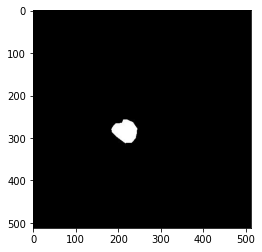

In [13]:
import matplotlib.pyplot as plt
# vis.plot_loss_update(0.1, 0.5)
image = plt.imread("E:\data\BrainTumor\masks\\7_1.jpg")
# vis.update_image(image[:,:,0])
plt.imshow(image)
plt.show()

# Test SegmentationData

In [1]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)
# data.show_batch()

In [ ]:
# data.show_batch()

# Test trainer

In [1]:
from data.SegmentationData import SegmentationData
from config import config
from train.train import Trainer
import torch
data = SegmentationData(config)
trainer = Trainer(config, data)

In [15]:
# sampler = trainer.data.load_batch("train")
# images = sampler[0][0:1].to(trainer.device)
# labels = sampler[1][0:1].to(trainer.device)
# trainer.net.eval()
# with torch.no_grad():
#     outputs = trainer.net(images)
#     outputs_sigmoid = torch.sigmoid(outputs)

In [ ]:
trainer.train()

In [6]:
trainer.crition(labels, outputs)

tensor(0.6984)

# Test Model

In [ ]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)

In [ ]:
from model.Unet import Unet
import torch
x = torch.ones([1, 1, 192, 192])
net = Unet(1, 1, padding = 1)
x.shape, net(x).shape

In [ ]:
from model.Unet import Up
import torch
x = torch.empty([1, 1024, 4, 4])
up = Up([1024, 512, 512])
up(x)

In [ ]:
import torch.nn as nn
from model.Unet import MultiConv
MultiConv([2, 1, 1], True, 0)(x1)

nn.BatchNorm2d(1)(x2).sum()

In [ ]:
import torch
import torch.nn.functional as F



diffY = x2.size()[2] - x1.size()[2]
diffX = x2.size()[3] - x1.size()[3]

x2 = F.pad(x2, [
        -diffX//2, -diffX//2,
        -diffY//2, -diffY//2
        ])
x1.shape, x2.shape

# Test BrainTumorDataset

In [ ]:
from dataset.BrainTumorDataset import BrainTumorDataset
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.ToTensor()
]
)
dataset_args = {
    "input_folder":'E:\data\BrainTumor',
}
dataset = BrainTumorDataset(dataset_args, transform_train, "train")

In [ ]:
dataset.show_sample()

# Test split train val

In [ ]:
from dataset.BrainTumorDataset import PrepairBrainTumorDataset
prepaireDataset = PrepairBrainTumorDataset('E:\data\BrainTumorRaw','E:\data\BrainTumor')
prepaireDataset.split_train_test_val()